Note: Ganti BASE_DIR sesuai path masing-masing

In [ ]:
BASE_DIR = "/content/drive/MyDrive/DataMining-TK1/Output"
MODEL_NAME = "GAN-OurIndoBERT-v2"
BATCH_SIZE = 32
MAX_SEQ = 256
NUM_EPOCH = 10
UPLOAD_KEY = 95929

In [ ]:
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = open(BASE_DIR + '/{}-b{}-seq{}-e{:02d}.csv'.format(MODEL_NAME, BATCH_SIZE, MAX_SEQ, 1),'rb')

# Request and Scrap

In [ ]:
current_time = str(datetime.datetime.now()).replace(" ", "-")[:-7]

precision_aspect_only = []
recall_aspect_only = []
f1_score_aspect_only = []
precision_aspect_sentiment = []
recall_aspect_sentiment = []
f1_score_aspect_sentiment = []


for epoch in range(NUM_EPOCH):
  file = open(BASE_DIR + '/{}-b{}-seq{}-e{:02d}.csv'.format(MODEL_NAME, BATCH_SIZE, MAX_SEQ, epoch+1),'rb')
  files = {'file': file}
  values = {'uploadkey': UPLOAD_KEY, 'submit': 1}

  r = requests.post("https://penambangandata2021.herokuapp.com/upload.php", files=files, data=values, allow_redirects=True)

  assert r.status_code == 200, "Web error"
  result = r.text

  precision_aspect_only.append(float(result[result.index("</strong>")+10:result.index("<br>")]))
  result = result[result.index("<br>")+4:]
  recall_aspect_only.append(float(result[result.index("</strong>")+10:result.index("<br>")]))
  result = result[result.index("<br>")+4:]
  f1_score_aspect_only.append(float(result[result.index("</strong>")+10:result.index("<br>")]))
  result = result[result.index("<br>")+4:]
  precision_aspect_sentiment.append(float(result[result.index("</strong>")+10:result.index("<br>")]))
  result = result[result.index("<br>")+4:]
  recall_aspect_sentiment.append(float(result[result.index("</strong>")+10:result.index("<br>")]))
  result = result[result.index("<br>")+4:]
  f1_score_aspect_sentiment.append(float(result[result.index("</strong>")+10:result.index("<br>")]))

# Result

In [ ]:
print("Aspect only F1 score max at epoch: {}".format(np.argmax(f1_score_aspect_only)))
print("Aspect-Sentiment F1 score max at epoch: {}".format(np.argmax(f1_score_aspect_sentiment)))

Aspect only F1 score max at epoch: 4
Aspect-Sentiment F1 score max at epoch: 4


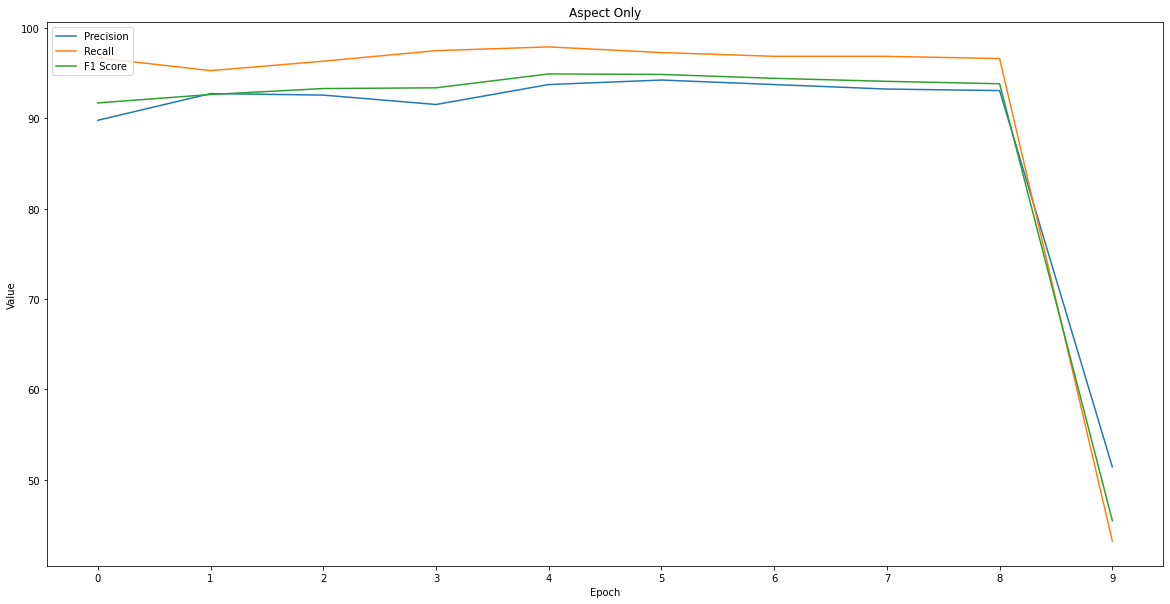

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(range(NUM_EPOCH))
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Aspect Only")
plt.plot(precision_aspect_only, label="Precision")
plt.plot(recall_aspect_only, label="Recall")
plt.plot(f1_score_aspect_only, label="F1 Score")
plt.legend(loc="upper left")
plt.savefig(BASE_DIR + '/Metric Per Epoch/{}-b{}-seq{}-aspect-only-metric-{}.jpg'.format(MODEL_NAME, BATCH_SIZE, MAX_SEQ, current_time))

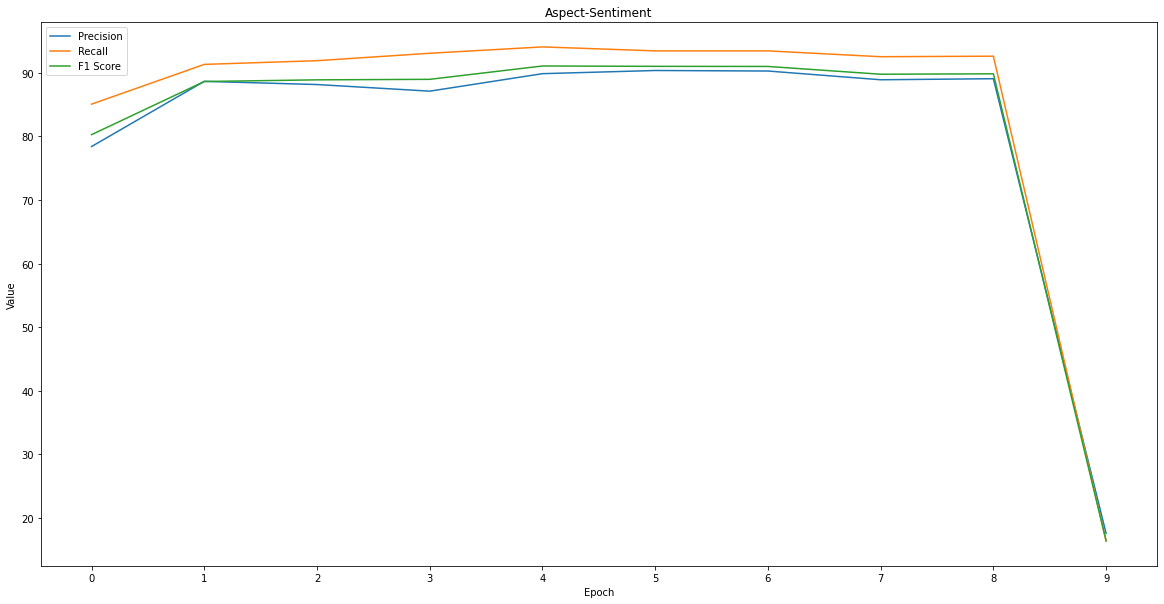

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(range(NUM_EPOCH))
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Aspect-Sentiment")
plt.plot(precision_aspect_sentiment, label="Precision")
plt.plot(recall_aspect_sentiment, label="Recall")
plt.plot(f1_score_aspect_sentiment, label="F1 Score")
plt.legend(loc="upper left")
plt.savefig(BASE_DIR + '/Metric Per Epoch/{}-b{}-seq{}-aspect-sentiment-metric-{}.jpg'.format(MODEL_NAME, BATCH_SIZE, MAX_SEQ, current_time))

# Save values

In [ ]:
df = pd.DataFrame({'Epoch': range(NUM_EPOCH), 
              'Precision Aspect Only': precision_aspect_only, 
              'Recall Aspect Only': recall_aspect_only, 
              'F1 Score Aspect Only': f1_score_aspect_only, 
              'Precision Aspect Sentiment': precision_aspect_sentiment, 
              'Recall Aspect Sentiment': recall_aspect_sentiment, 
              'F1 Score Aspect Sentiment': f1_score_aspect_sentiment})
df.to_csv(BASE_DIR + '/{}-b{}-seq{}-metric-{}.csv'.format(MODEL_NAME, BATCH_SIZE, MAX_SEQ, current_time), index=False)

In [ ]:
file = open(BASE_DIR + '/{}-b{}-seq{}-e{:02d}.csv'.format("OurIndoBERT", BATCH_SIZE, MAX_SEQ, 10),'rb')
files = {'file': file}
values = {'uploadkey': UPLOAD_KEY, 'submit': 1}

r = requests.post("https://penambangandata2021.herokuapp.com/upload.php", files=files, data=values, allow_redirects=True)